In [1]:
from pathlib import Path
# from random import shuffle

Get all data and label arrays as a list of filenames

In [2]:
data = Path("dataset/")
data_files = list(data.iterdir())
# print(f"before shuffle {data_files}")
# shuffle(data_files)
# print(f"after shuffle {data_files}")
print(f"{len(data_files)} files found")

55 files found


Seperate into data and labels

In [3]:
data = sorted(list(filter(lambda x: "batch" in str(x), data_files)))
labels = sorted(list(filter(lambda x: "label" in str(x), data_files)))

# test_data = sorted(list(filter(lambda x: "batch" in str(x), data_files)))
# test_labels = sorted(list(filter(lambda x: "label" in str(x), data_files)))

print(f"Data files: {len(data)}")
print(f"Label files: {len(labels)}")

# print(f"Testing sets: {len(test_data)} files")

Data files: 27
Label files: 27


Check data and label order

In [4]:
for x,label in zip(data, labels):
    if str(x)[14:] != str(label)[14:]:
        print("[!!!] Label and data mis aligned")
        print(f"{str(x)} ({str(x)[18:]}) does not correspond to {str(label)} ({str(label)[19:]})")
        break
        
# for x,label in zip(test_data, test_labels):
#     if str(x)[18:] != str(label)[19:]:
#         print("[!!!] Test label and data mis aligned")
#         print(f"{str(x)} ({str(x)[18:]}) does not correspond to {str(label)} ({str(label)[19:]})")
#         break

### Build dataloader

In [5]:
import numpy
from keras.utils import to_categorical, Sequence

/home/adityas/miniconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [6]:
class Loader(Sequence):
    
    def __init__(self, data_files, label_files, one_hot=True):
        self.data = data_files
        self.labels = label_files
        self.one_hot = one_hot
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        data = numpy.load(self.data[idx])
        labels = numpy.load(self.labels[idx])
        
        if self.one_hot:
            return data, to_categorical(labels)
        else:
            return data, labels

### Test simple models

In [7]:
from sklearn.linear_model import SGDClassifier

##### Training loop

In [8]:
from sklearn.utils import shuffle

data, labels = shuffle(data, labels)


# Split data
train_data = data[:15]
train_labels = labels[:15]

val_data = data[15:20]
val_labels = labels[15:20]

test_data = data[20:]
test_labels = labels[20:]

# define datasets
train_dataset = Loader(train_data, train_labels, True)
val_dataset = Loader(val_data, val_labels, True)
test_dataset = Loader(test_data, test_labels, True)

In [9]:
## Check Data imbalance

print(f"For training")

data = list(train_dataset)
y = numpy.concatenate(list(map(lambda x: x[1].argmax(axis=1), data)), axis=0)
X = numpy.concatenate(list(map(lambda x: x[0], data)), axis=0)

print(f"Class 0: {numpy.sum((y==0))}/{y.shape[0]} = {numpy.sum((y==0.0) * 1.0) / y.shape[0]}")
print(f"Class 1: {numpy.sum((y==1))}/{y.shape[0]} = {numpy.sum((y==1.0) * 1.0) / y.shape[0]}")
print(f"Class 2: {numpy.sum((y==2))}/{y.shape[0]} = {numpy.sum((y==2.0) * 1.0) / y.shape[0]}")
print(f"Class 3: {numpy.sum((y==3))}/{y.shape[0]} = {numpy.sum((y==3.0) * 1.0) / y.shape[0]}")
# print(f"Total {numpy.sum(y[y==0] * 1.0) + numpy.sum(y[y==1] * 1.0) + numpy.sum(y[y==2] * 1.0) + numpy.sum(y[y==3] * 1.0)}")
# print(f"X is {X.shape}")

print("For validation")

data = list(val_dataset)
y = numpy.concatenate(list(map(lambda x: x[1].argmax(axis=1), data)), axis=0)
X = numpy.concatenate(list(map(lambda x: x[0], data)), axis=0)

print(f"Class 0: {numpy.sum((y==0))}/{y.shape[0]} = {numpy.sum((y==0.0) * 1.0) / y.shape[0]}")
print(f"Class 1: {numpy.sum((y==1))}/{y.shape[0]} = {numpy.sum((y==1.0) * 1.0) / y.shape[0]}")
print(f"Class 2: {numpy.sum((y==2))}/{y.shape[0]} = {numpy.sum((y==2.0) * 1.0) / y.shape[0]}")
print(f"Class 3: {numpy.sum((y==3))}/{y.shape[0]} = {numpy.sum((y==3.0) * 1.0) / y.shape[0]}")

print(f"For testing")

data = list(test_dataset)
y = numpy.concatenate(list(map(lambda x: x[1].argmax(axis=1), data)), axis=0)
X = numpy.concatenate(list(map(lambda x: x[0], data)), axis=0)

print(f"Class 0: {numpy.sum((y==0))}/{y.shape[0]} = {numpy.sum((y==0.0) * 1.0) / y.shape[0]}")
print(f"Class 1: {numpy.sum((y==1))}/{y.shape[0]} = {numpy.sum((y==1.0) * 1.0) / y.shape[0]}")
print(f"Class 2: {numpy.sum((y==2))}/{y.shape[0]} = {numpy.sum((y==2.0) * 1.0) / y.shape[0]}")
print(f"Class 3: {numpy.sum((y==3))}/{y.shape[0]} = {numpy.sum((y==3.0) * 1.0) / y.shape[0]}")


For training
Class 0: 16362/145918 = 0.11213147110020696
Class 1: 44020/145918 = 0.3016762839402952
Class 2: 43860/145918 = 0.3005797776833564
Class 3: 41676/145918 = 0.28561246727614137
For validation
Class 0: 5658/50000 = 0.11316
Class 1: 14892/50000 = 0.29784
Class 2: 15156/50000 = 0.30312
Class 3: 14294/50000 = 0.28588
For testing
Class 0: 7934/70000 = 0.11334285714285715
Class 1: 21088/70000 = 0.30125714285714283
Class 2: 20984/70000 = 0.2997714285714286
Class 3: 19994/70000 = 0.28562857142857145


#### Make linear model

In [10]:
from keras.models import Model
from keras.layers import Dense, Input
from keras.callbacks import EarlyStopping

import matplotlib.pyplot as plotter
from keras.utils import plot_model
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

from sklearn.metrics import confusion_matrix
import seaborn

In [11]:
_input = Input(shape=(200,))
out = Dense(4, activation='softmax')(_input)
model = Model(inputs=_input, outputs=out)

In [12]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["acc"])
estopper = EarlyStopping(patience=10, monitor="val_acc")

In [13]:
history = model.fit_generator(callbacks=[estopper], generator=train_dataset, steps_per_epoch=100, validation_data=val_dataset, epochs=1000, validation_steps=10, verbose=2)

Epoch 1/1000
 - 2s - loss: 1.4174 - acc: 0.2882 - val_loss: 1.3877 - val_acc: 0.2896
Epoch 2/1000
 - 2s - loss: 1.3740 - acc: 0.2922 - val_loss: 1.3648 - val_acc: 0.2900
Epoch 3/1000
 - 2s - loss: 1.3546 - acc: 0.2957 - val_loss: 1.3483 - val_acc: 0.2898
Epoch 4/1000
 - 2s - loss: 1.3399 - acc: 0.3021 - val_loss: 1.3353 - val_acc: 0.3015
Epoch 5/1000
 - 2s - loss: 1.3276 - acc: 0.3124 - val_loss: 1.3242 - val_acc: 0.3066
Epoch 6/1000
 - 2s - loss: 1.3172 - acc: 0.3260 - val_loss: 1.3144 - val_acc: 0.3212
Epoch 7/1000
 - 2s - loss: 1.3076 - acc: 0.3386 - val_loss: 1.3053 - val_acc: 0.3385
Epoch 8/1000
 - 2s - loss: 1.2989 - acc: 0.3522 - val_loss: 1.2971 - val_acc: 0.3605
Epoch 9/1000
 - 2s - loss: 1.2905 - acc: 0.3644 - val_loss: 1.2891 - val_acc: 0.3672
Epoch 10/1000
 - 2s - loss: 1.2828 - acc: 0.3734 - val_loss: 1.2813 - val_acc: 0.3744
Epoch 11/1000
 - 2s - loss: 1.2752 - acc: 0.3812 - val_loss: 1.2739 - val_acc: 0.3851
Epoch 12/1000
 - 2s - loss: 1.2679 - acc: 0.3896 - val_loss: 1.

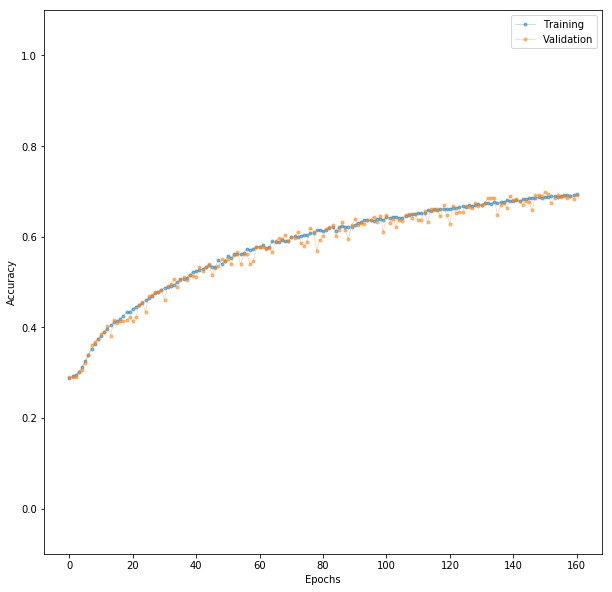

In [14]:
fig = plotter.figure(figsize=(10, 10))
plotter.plot(history.history["acc"], label = "Training", alpha=0.5, linewidth=0.5, marker='.')
plotter.plot(history.history["val_acc"], label = "Validation", alpha=0.5, linewidth=0.5, marker='.')
plotter.xlabel("Epochs")
plotter.ylabel("Accuracy")
plotter.ylim(-0.1, 1.1)
plotter.legend()
fig.savefig("model_acc.png")
plotter.show()

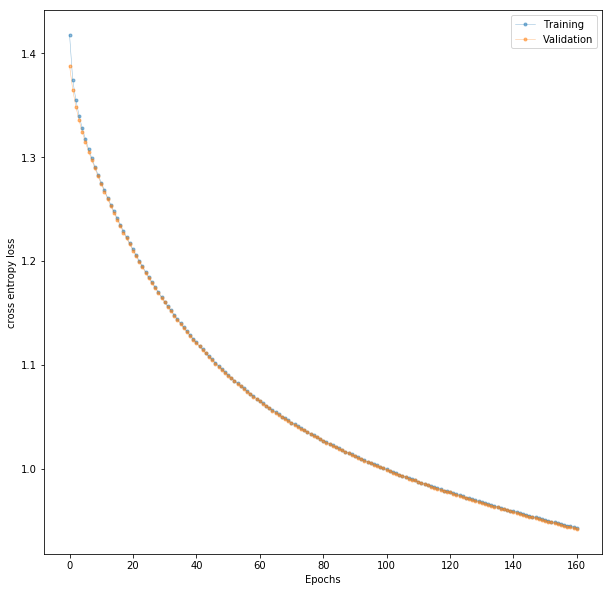

In [15]:
fig = plotter.figure(figsize=(10, 10))
plotter.plot(history.history["loss"], label = "Training", alpha=0.5, linewidth=0.5, marker='.')
plotter.plot(history.history["val_loss"], label = "Validation", alpha=0.5, linewidth=0.5, marker='.')
# plotter.ylim(-0.1, 1.1)
plotter.xlabel("Epochs")
plotter.ylabel("cross entropy loss")
plotter.legend()
fig.savefig("model_loss.png")
plotter.show()

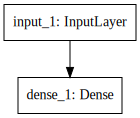

In [16]:
plot_model(model, show_layer_names=True, show_shapes=True)
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [17]:
print(model.evaluate_generator(generator=test_dataset, steps=len(test_dataset)))

[0.9436952556882586, 0.6874571442604065]


In [39]:
data = list(test_dataset)
X = numpy.concatenate(list(map(lambda x: x[0],data)), axis=0)
# print(X.shape)
y = numpy.concatenate(list(map(lambda x: x[1].argmax(axis=1), data)), axis=0)
# print(y.shape)


pred = model.predict(X)
mat = confusion_matrix(y_pred=pred.argmax(axis=1), y_true=y, labels=[0,1,2,3])
print(mat)

[[ 7934     0     0     0]
 [  127 18202  1850   909]
 [  116  3183 15749  1936]
 [    0  8239  5518  6237]]


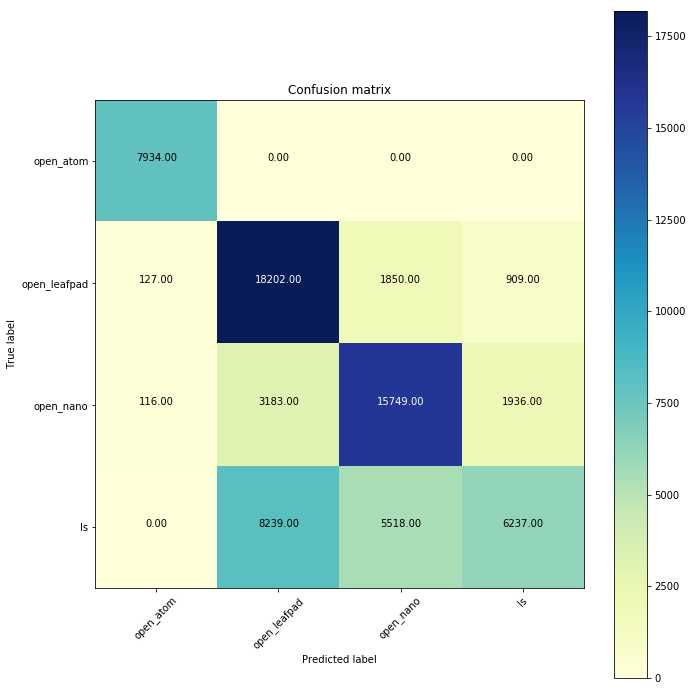

In [40]:
import itertools
classes = ["open_atom", "open_leafpad", "open_nano", "ls"]

fig = plotter.figure(figsize=(10, 10))
plotter.imshow(mat, interpolation='nearest', cmap="YlGnBu")
plotter.title("Confusion matrix")
plotter.colorbar()
tick_marks = numpy.arange(len(classes))
plotter.xticks(tick_marks, classes, rotation=45)
plotter.yticks(tick_marks, classes)

fmt = '.2f'
thresh = mat.max() / 2.
for i, j in itertools.product(range(mat.shape[0]), range(mat.shape[1])):
    plotter.text(j, i, format(mat[i, j], fmt),
             horizontalalignment="center",
             color="white" if mat[i, j] > thresh else "black")

plotter.ylabel('True label')
plotter.xlabel('Predicted label')
plotter.tight_layout()
fig.savefig("model_cmatrix.png")
plotter.show()

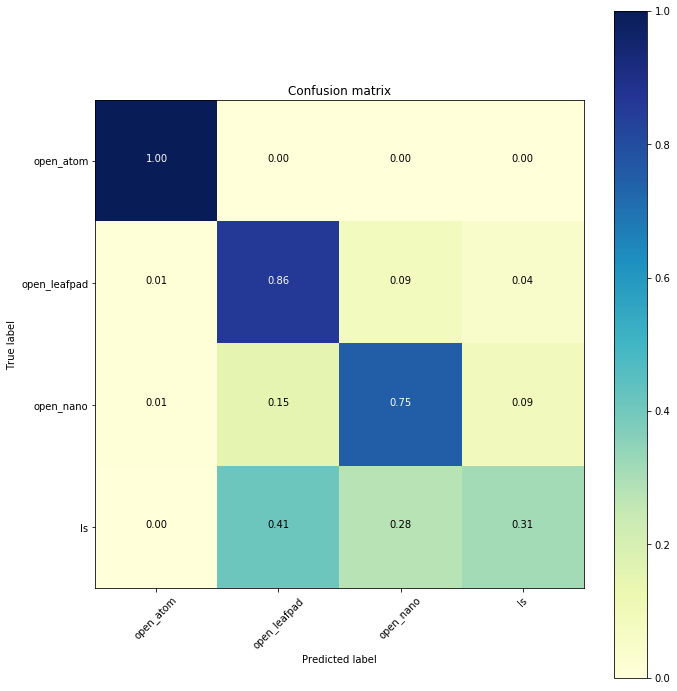

In [41]:
import itertools
classes = ["open_atom", "open_leafpad", "open_nano", "ls"]

mat = mat.astype('float') / mat.sum(axis=1)[:, numpy.newaxis]

fig = plotter.figure(figsize=(10, 10))
plotter.imshow(mat, interpolation='nearest', cmap="YlGnBu")
plotter.title("Confusion matrix")
plotter.colorbar()
tick_marks = numpy.arange(len(classes))
plotter.xticks(tick_marks, classes, rotation=45)
plotter.yticks(tick_marks, classes)

fmt = '.2f'
thresh = mat.max() / 2.
for i, j in itertools.product(range(mat.shape[0]), range(mat.shape[1])):
    plotter.text(j, i, format(mat[i, j], fmt),
             horizontalalignment="center",
             color="white" if mat[i, j] > thresh else "black")

plotter.ylabel('True label')
plotter.xlabel('Predicted label')
plotter.tight_layout()
fig.savefig("model_cmatrix_norm.png")
plotter.show()

#### Deeper model

In [21]:
d_input = Input(shape=(200,))
dense = Dense(100, activation='sigmoid')(d_input)
dout = Dense(4, activation='softmax')(dense)
dmodel = Model(inputs=d_input, outputs=dout)

In [22]:
dmodel.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["acc"])
estopper = EarlyStopping(patience=10, monitor="val_acc")

In [23]:
history = dmodel.fit_generator(callbacks=[estopper], generator=train_dataset, steps_per_epoch=100, validation_data=val_dataset, epochs=1000, validation_steps=10, verbose=2)

Epoch 1/1000
 - 4s - loss: 1.2783 - acc: 0.3201 - val_loss: 1.2092 - val_acc: 0.3989
Epoch 2/1000
 - 4s - loss: 1.1588 - acc: 0.5556 - val_loss: 1.0944 - val_acc: 0.6856
Epoch 3/1000
 - 4s - loss: 0.9970 - acc: 0.7696 - val_loss: 0.8757 - val_acc: 0.8585
Epoch 4/1000
 - 4s - loss: 0.7502 - acc: 0.8801 - val_loss: 0.6330 - val_acc: 0.8920
Epoch 5/1000
 - 4s - loss: 0.5549 - acc: 0.8987 - val_loss: 0.4853 - val_acc: 0.9045
Epoch 6/1000
 - 4s - loss: 0.4352 - acc: 0.9162 - val_loss: 0.3868 - val_acc: 0.9216
Epoch 7/1000
 - 4s - loss: 0.3476 - acc: 0.9343 - val_loss: 0.3085 - val_acc: 0.9428
Epoch 8/1000
 - 4s - loss: 0.2763 - acc: 0.9513 - val_loss: 0.2431 - val_acc: 0.9583
Epoch 9/1000
 - 4s - loss: 0.2172 - acc: 0.9626 - val_loss: 0.1902 - val_acc: 0.9670
Epoch 10/1000
 - 4s - loss: 0.1701 - acc: 0.9710 - val_loss: 0.1493 - val_acc: 0.9738
Epoch 11/1000
 - 4s - loss: 0.1347 - acc: 0.9806 - val_loss: 0.1186 - val_acc: 0.9850
Epoch 12/1000
 - 4s - loss: 0.1084 - acc: 0.9873 - val_loss: 0.

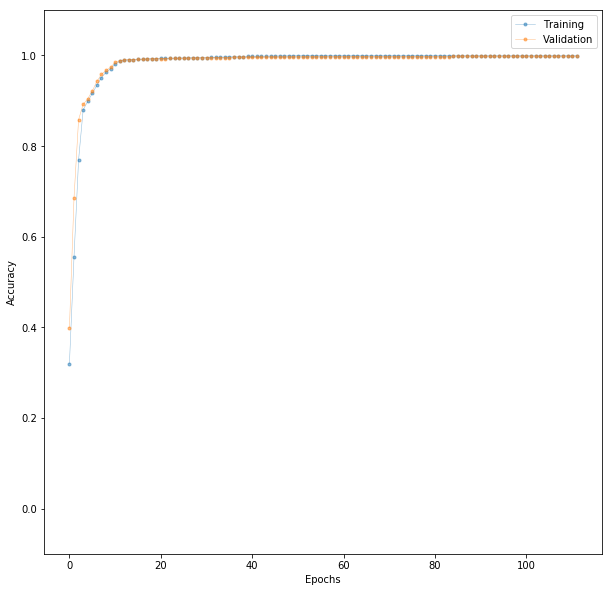

In [24]:
fig = plotter.figure(figsize=(10, 10))
plotter.plot(history.history["acc"], label = "Training", alpha=0.5, linewidth=0.5, marker='.')
plotter.plot(history.history["val_acc"], label = "Validation", alpha=0.5, linewidth=0.5, marker='.')
plotter.xlabel("Epochs")
plotter.ylabel("Accuracy")
plotter.ylim(-0.1, 1.1)
plotter.legend()
fig.savefig("dmodel_acc.png")
plotter.show()

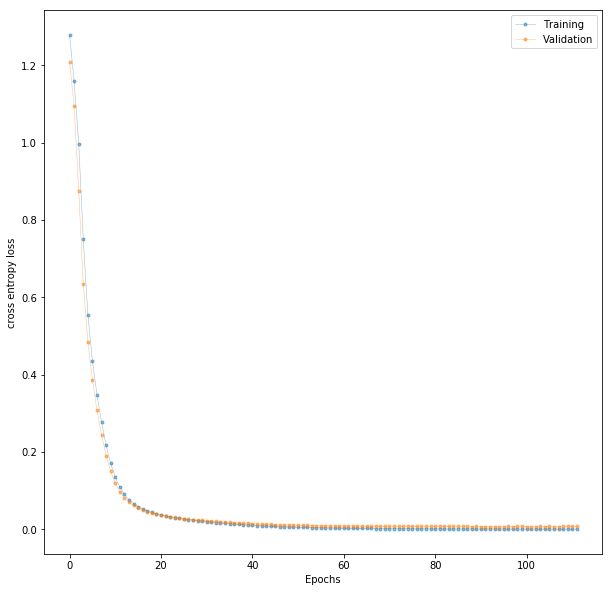

In [25]:
fig = plotter.figure(figsize=(10, 10))
plotter.plot(history.history["loss"], label = "Training", alpha=0.5, linewidth=0.5, marker='.')
plotter.plot(history.history["val_loss"], label = "Validation", alpha=0.5, linewidth=0.5, marker='.')
# plotter.ylim(-0.1, 1.1)
plotter.xlabel("Epochs")
plotter.ylabel("cross entropy loss")
plotter.legend()
fig.savefig("dmodel_loss.png")
plotter.show()

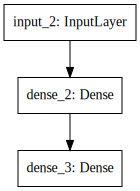

In [26]:
plot_model(dmodel, show_layer_names=True, show_shapes=True, to_file="dmodel.png")
SVG(model_to_dot(dmodel).create(prog='dot', format='svg'))

In [28]:
print(dmodel.evaluate_generator(generator=test_dataset, steps=len(test_dataset)))

[0.006543321668037346, 0.9980428644589016]


In [36]:
data = list(test_dataset)
X = numpy.concatenate(list(map(lambda x: x[0],data)), axis=0)
# print(X.shape)
y = numpy.concatenate(list(map(lambda x: x[1].argmax(axis=1), data)), axis=0)
# print(y.shape)


pred = dmodel.predict(X)
mat = confusion_matrix(y_pred=pred.argmax(axis=1), y_true=y, labels=[0,1,2,3])
print(mat)

[[ 7934     0     0     0]
 [   44 21022    14     8]
 [    9    26 20948     1]
 [    0    21    14 19959]]


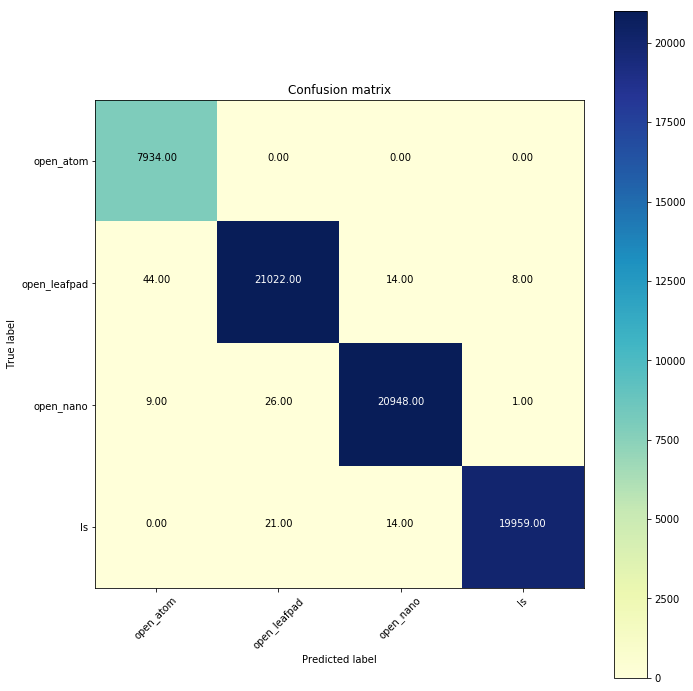

In [37]:
import itertools
classes = ["open_atom", "open_leafpad", "open_nano", "ls"]

fig = plotter.figure(figsize=(10, 10))
plotter.imshow(mat, interpolation='nearest', cmap="YlGnBu")
plotter.title("Confusion matrix")
plotter.colorbar()
tick_marks = numpy.arange(len(classes))
plotter.xticks(tick_marks, classes, rotation=45)
plotter.yticks(tick_marks, classes)

fmt = '.2f'
thresh = mat.max() / 2.
for i, j in itertools.product(range(mat.shape[0]), range(mat.shape[1])):
    plotter.text(j, i, format(mat[i, j], fmt),
             horizontalalignment="center",
             color="white" if mat[i, j] > thresh else "black")

plotter.ylabel('True label')
plotter.xlabel('Predicted label')
plotter.tight_layout()
fig.savefig("dmodel_cmatrix.png")
plotter.show()

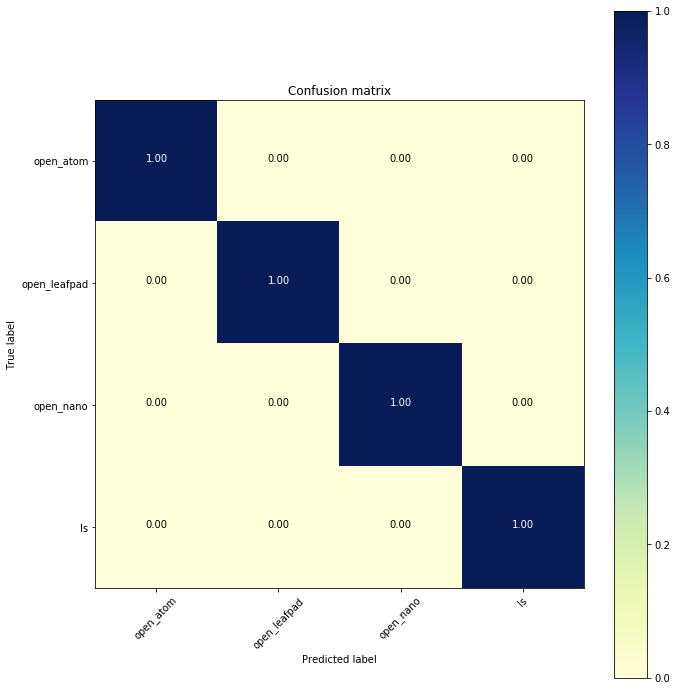

In [38]:
import itertools
classes = ["open_atom", "open_leafpad", "open_nano", "ls"]

mat = mat.astype('float') / mat.sum(axis=1)[:, numpy.newaxis]

fig = plotter.figure(figsize=(10, 10))
plotter.imshow(mat, interpolation='nearest', cmap="YlGnBu")
plotter.title("Confusion matrix")
plotter.colorbar()
tick_marks = numpy.arange(len(classes))
plotter.xticks(tick_marks, classes, rotation=45)
plotter.yticks(tick_marks, classes)

fmt = '.2f'
thresh = mat.max() / 2.
for i, j in itertools.product(range(mat.shape[0]), range(mat.shape[1])):
    plotter.text(j, i, format(mat[i, j], fmt),
             horizontalalignment="center",
             color="white" if mat[i, j] > thresh else "black")

plotter.ylabel('True label')
plotter.xlabel('Predicted label')
plotter.tight_layout()
fig.savefig("dmodel_cmatrix_norm.png")
plotter.show()